In this notebook, the character networks are created and plotted to analyze the trends occurring accross the 5 seasons of The Magnus Archives.

In [32]:
# Importing the necessary libraries
import networkx as nx
import pandas as pd
import os

Season 1 character network:

In [33]:
# The folder for the first season
season1_folder = 'C:/Users/Marija/Documents/Studies/Master/Computational Literary Studies/Final_Project/Seasons_txts/season1'

occurrences = []

# Iterate over episodes
for episode_file in os.listdir(season1_folder):
    episode_path = os.path.join(season1_folder, episode_file)
    
    # All the files should already be in .txt format, but to be safe, we skip non-txt files
    if not episode_file.endswith('.txt'):
        continue
    
    # Read the text file
    with open(episode_path, 'r', encoding='utf-8') as file:
        text = file.read()
    
    # Since the transcripts are formatted like scripts, the names of the characters that interact (in dialogues or monologues)
    # are completely capitalized. This is why we extract completely capitalized words. We also increase the length to avoid
    # common short words, such as "I".
    occ = [word.strip() for word in text.split() if word.isupper() and len(word) > 2]
    
    # Add the occurrences to the list
    occurrences.append(occ)

In [34]:
def is_alpha_with_special(word):
    """Check if all of the characters in a word are letters or '!' (for NOT!SASHA)"""
    return all(char.isalpha() or char == '!' for char in word)

occurrences_filt = []

# The data is noisy. To mark that the characters shout, all words are completely upper-cased. There are many acronyms.
# Certain worsd have also been split up when converting from PDF to .txt. Finally, certain characters have both first and
# last names appearing together, and we keep only one.
to_filter = ["SIMS", "AH!", "NHS", "YOU", "HIS", "AND", "BROUGHT", "MAG", "ALSO", "SFX", "THE", "CONT", "DIE", "NOT",
            "SURPRISE!", "IKEA", "GPS", "CCTV", "CRT", "VHS", "UP!", "WAKE", "DOOR", "OPEN", "TELL", "NO!!", "LEAVE!", "ME!",
            "ALONE!", "QUESTION", "ANSWER", "BBC", "DOP", "MAX", "DKN", 'SHARP', 'SQUEAL', 'EAT', 'WHO', 'SOME', 'FOR',
            'THIS', 'KNO', 'LIKE', 'UTC', 'ONE', "HMP", "ECDC", "BPCA", "HMRC", "CSC", "ERU", "CREAKS", "SUV", "ALARM", "CAN", 
             "SOUND", "BANGING", "THEN", 'COLLAPSING', 'BEING', 'PACKAGE', 'EMT', 'IMMEDIATE', 'ABC', "CNCC", 'CRO', 'ISBN',
            'NOISES', 'FIRE', 'EXTINGUISHER', 'RUNNING', 'PURSUIT', 'LOOK', 'OUT!', 'WET', 'NDA', 'FOI', 'HAHHH!', 'HMMM!',
            'LED', 'CMH', 'AKA', 'ESP', 'NCO', 'HMPS', 'UCL', 'DNA', 'WTG', 'INTENSIF', 'NO!', 'OCR', 'WANTS', 'ANOTHER',
            'POLITE', 'IFBB', "NOOOOOO!", 'PAPER', 'WAVED', 'PUSHED', 'NOW', 'THROUGH', 'UPMC', 'TSA', 'IMDB', 'HELL', 'ARE',
            'DAMN!', 'RPU', 'WHAT', 'UGHH!', 'POW', 'GBH', 'HMS', 'DROPS', 'FBI', 'VPN', 'ARC', 'SHUTS', 'USB', 'SOUNDS',
            'HEARD', 'EMF', 'VISIT', 'AAH!', 'STUMBL', 'HEAVILY', 'FALLING', 'THUMP', 'GCSE', 'SCRAPING', 'PARASITIC', 'SLR',
            'MRI', 'IMS', 'OCD', 'RETRIEVED', 'JONAT', 'HAN', 'EXTRACT', 'ING', 'JONA', 'THAN', 'SOUN', 'SCREAMS', 'MAR',
            'TIN', 'VIST', 'ARCHI', 'MEL', 'ANIE', 'NIE', 'MELA', 'JONATH', 'ONT', 'ARCHIVIS', 'ARTH', 'CID', 'IST', 'ARCHIV',
            'IVIST', 'AUDIO', 'HIVIST', 'FROM', 'TIM!', 'FIGHTING', 'ALAR', 'FADES', 'TILE', 'CALMING', 'BREATH', 'OPENS',
            'JONATHA', 'WRITHING', 'ARCH', 'XIAOL', 'LAPD', 'GERTRU', 'GEORG', '!SASHA', 'ARCHIVI', 'SASHA!', 'PLASTERBOARD',
            'FIREALARM', 'DRAWING', 'DAIS', 'LEITNE', 'GERAR', 'ARCHVIST', 'ARCHIVST', 'BASRIA', 'SHIPHAND', 'MARTI', 'MART',
            'BASI', 'NISI', 'ACKGROUND', 'HELE', 'NIHIL', 'ANN', 'ABELLE', 'CANE', 'TAPE', 'FAIRCHILD', 'HOPWORTH', 'PERRY']

# we filter out the occurrences to only keep the relevant ones
for lst in occurrences:
    filtered_list = []
    for name in lst:
        if is_alpha_with_special(name) and name not in to_filter:
            filtered_list.append(name)
    occurrences_filt.append(filtered_list)

In [35]:
from itertools import combinations

# Process interactions to get the networks
def process_interactions(occurrences_filt):
    G = nx.Graph()
    
    for occ in occurrences_filt:
        si, ei = 0, 2
        while ei < len(occ):
            interaction = []
            for character in set(occ[si:ei]):
                if ' ' in character:
                    interaction.extend(character.split())
                else:
                    interaction.append(character)
            interaction = set(interaction)
            if len(interaction) > 1:
                for sp1, sp2 in combinations(interaction, 2):
                    if G.has_edge(sp1, sp2):
                        G[sp1][sp2]['weight'] += 1
                    else:
                        G.add_edge(sp1, sp2, weight=1)
            si += 1
            ei += 1

    return G

# Save season 1 information in an accessible variable
G1 = process_interactions(occurrences_filt)

In [36]:
print(G1.nodes)
print(f"# nodes = {G1.number_of_nodes()}, # edges = {G1.number_of_edges()}")
print('# interactions:', G1.size(weight='weight'))

['NAOMI', 'JONATHAN', 'LEE', 'LAURA', 'ELIAS', 'MARTIN', 'SASHA', 'MELANIE', 'TIM', 'ARCHIVIST', 'ELLIOT', 'BREEKON', 'HOPE', 'WORM', 'CHORUS', 'PRENTISS', 'WORMS', 'NOT!SASHA']
# nodes = 18, # edges = 29
# interactions: 568.0


The preprocessing is the same for all other seasons.

Season 2.

In [37]:
season2_folder = 'C:/Users/Marija/Documents/Studies/Master/Computational Literary Studies/Final_Project/Seasons_txts/season2'

occurrences = []

for episode_file in os.listdir(season2_folder):
    episode_path = os.path.join(season2_folder, episode_file)
    
    if not episode_file.endswith('.txt'):
        continue
    
    with open(episode_path, 'r', encoding='utf-8') as file:
        text = file.read()
    
    occ = [word.strip() for word in text.split() if word.isupper() and len(word) > 2]
    occurrences.append(occ)

occurrences_filt = []

for lst in occurrences:
    filtered_list = []
    for name in lst:
        if is_alpha_with_special(name) and name not in to_filter:
            filtered_list.append(name)
    occurrences_filt.append(filtered_list)

G2 = process_interactions(occurrences_filt)

print(G2.nodes)
print(f"# nodes = {G2.number_of_nodes()}, # edges = {G2.number_of_edges()}")
print('# interactions:', G2.size(weight='weight'))

['BASIRA', 'ARCHIVIST', 'MARTIN', 'JONATHAN', 'HELEN', 'NOT!SASHA', 'MICHAEL', 'ELIAS', 'TIM', 'GERTRUDE', 'WALTER', 'JORDAN', 'EVA', 'DAISY', 'MARY', 'MELANIE', 'TESSA', 'KAROLINA', 'SASHA', 'UNKNOWN', 'LEITNER']
# nodes = 21, # edges = 35
# interactions: 987.0


Season 3.

In [38]:
season3_folder = 'C:/Users/Marija/Documents/Studies/Master/Computational Literary Studies/Final_Project/Seasons_txts/season3'

occurrences = []

for episode_file in os.listdir(season3_folder):
    episode_path = os.path.join(season3_folder, episode_file)
    
    if not episode_file.endswith('.txt'):
        continue
    
    with open(episode_path, 'r', encoding='utf-8') as file:
        text = file.read()
    
    occ = [word.strip() for word in text.split() if word.isupper() and len(word) > 2]
    occurrences.append(occ)

occurrences_filt = []

for lst in occurrences:
    filtered_list = []
    for name in lst:
        if is_alpha_with_special(name) and name not in to_filter:
            filtered_list.append(name)
    occurrences_filt.append(filtered_list)

G3 = process_interactions(occurrences_filt)

print(G3.nodes)
print(f"# nodes = {G3.number_of_nodes()}, # edges = {G3.number_of_edges()}")
print('# interactions:', G3.size(weight='weight'))

['SPIDER', 'ARCHIVIST', 'GUEST', 'GEORGIE', 'DAISY', 'MARTIN', 'TIM', 'ELIAS', 'MELANIE', 'GERTRUDE', 'BASIRA', 'JUDE', 'MIKE', 'OPERATOR', 'OFFICER', 'ELIA', 'CHIEF', 'ROSIE', 'GEORGI', 'SARAH', 'ORSINOV', 'MICHAEL', 'BREEKON', 'HOPE', 'LYNNE', 'SMITH', 'ROBIN', 'BRIAN', 'PETER', 'HELEN', 'KURT', 'XIAOLING', 'EVA', 'JULIA', 'TREVOR', 'GERARD', 'GERRY', 'NIKOLA', 'LEITNER', 'INSPECTOR']
# nodes = 40, # edges = 91
# interactions: 3141.0


Season 4.

In [39]:
season4_folder = 'C:/Users/Marija/Documents/Studies/Master/Computational Literary Studies/Final_Project/Seasons_txts/season4'

occurrences = []

for episode_file in os.listdir(season4_folder):
    episode_path = os.path.join(season4_folder, episode_file)
    
    if not episode_file.endswith('.txt'):
        continue
    
    with open(episode_path, 'r', encoding='utf-8') as file:
        text = file.read()
    
    occ = [word.strip() for word in text.split() if word.isupper() and len(word) > 2]
    occurrences.append(occ)

occurrences_filt = []

for lst in occurrences:
    filtered_list = []
    for name in lst:
        if is_alpha_with_special(name) and name not in to_filter:
            filtered_list.append(name)
    occurrences_filt.append(filtered_list)

G4 = process_interactions(occurrences_filt)

print(G4.nodes)
print(f"# nodes = {G4.number_of_nodes()}, # edges = {G4.number_of_edges()}")
print('# interactions:', G4.size(weight='weight'))

['PETER', 'MARTIN', 'ARCHIVIST', 'DAISY', 'BASIRA', 'ELIAS', 'BASIR', 'GERTRUDE', 'TREVOR', 'JULIA', 'OLIVER', 'GEORGIE', 'MELANIE', 'PETE', 'BREEKON', 'LUCIA', 'HELEN', 'JARED', 'THERAPIST', 'FLOYD', 'BYSTANDER', 'MANUELA', 'ARTHUR', 'ELIA', 'ABAT', 'UNKNOWN', 'SIMON', 'ERIC', 'DELANO']
# nodes = 29, # edges = 56
# interactions: 2747.0


Season 5.

In [40]:
season5_folder = 'C:/Users/Marija/Documents/Studies/Master/Computational Literary Studies/Final_Project/Seasons_txts/season5'

occurrences = []

for episode_file in os.listdir(season5_folder):
    episode_path = os.path.join(season5_folder, episode_file)
    
    if not episode_file.endswith('.txt'):
        continue
    
    with open(episode_path, 'r', encoding='utf-8') as file:
        text = file.read()
    
    occ = [word.strip() for word in text.split() if word.isupper() and len(word) > 2]
    occurrences.append(occ)

occurrences_filt = []


for lst in occurrences:
    filtered_list = []
    for name in lst:
        if is_alpha_with_special(name) and name not in to_filter:
            filtered_list.append(name)
    occurrences_filt.append(filtered_list)

G5 = process_interactions(occurrences_filt)

print(G5.nodes)
print(f"# nodes = {G5.number_of_nodes()}, # edges = {G5.number_of_edges()}")
print('# interactions:', G5.size(weight='weight'))

['TIM', 'MARTIN', 'ARCHIVIST', 'SASHA', 'JONAH', 'MAGNUS', 'GERTRUDE', 'JURGEN', 'LEITNER', 'GERARD', 'KEAY', 'HELEN', 'ANNABELLE', 'JUDE', 'JARED', 'ANNOUNCER', 'FRANCIS', 'SPIDER', 'FATHER', 'MOTHER', 'FRIEND', 'LOVER', 'CALLUM', 'BRODIE', 'SIMON', 'TREVOR', 'HERBERT', 'BASIRA', 'DAISY', 'MIKAELE', 'DOE', 'BREEKON', 'JORDAN', 'INSPECTOR', 'GUEST', 'MELANIE', 'GEORGIE', 'ARUN', 'LAVERNE', 'CELIA', 'UNNAMED', 'ROSIE', 'ANNABELL']
# nodes = 43, # edges = 98
# interactions: 5251.0


Next, we make several plots to explore the data. We use the nodes, the edges and the weights attributes of the character networks for each season to see how the development of the story could lead to relative changes in these values.

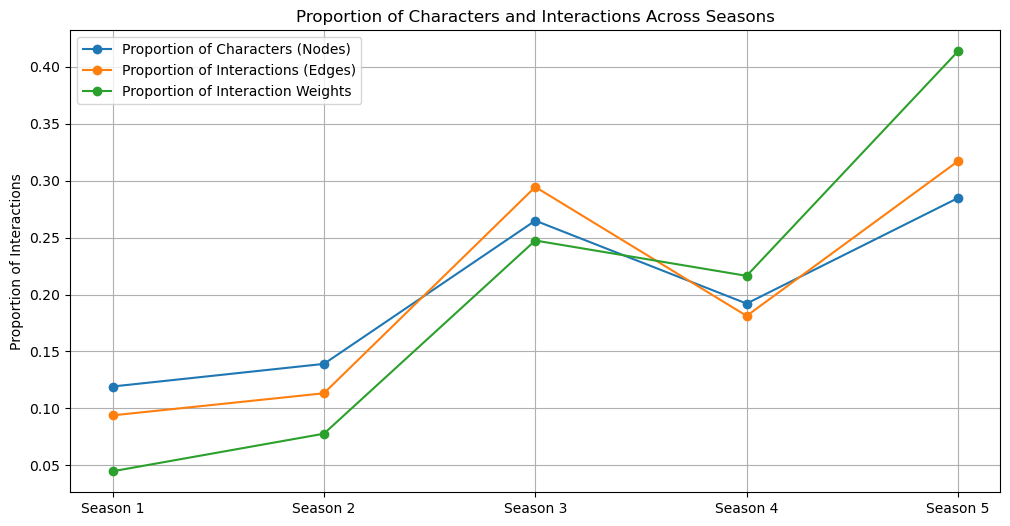

In [41]:
import matplotlib.pyplot as plt

# Our data
graphs = [G1, G2, G3, G4, G5]

# Initialize lists to store the number of nodes and edges for each season
num_nodes = []
num_edges = []
num_interactions = []

# Collect data from each G variable
for G in graphs:
    num_nodes.append(G.number_of_nodes()) # nodes
    num_edges.append(G.number_of_edges()) # edges
    num_interactions.append(G.size(weight='weight')) # weighted interactions

# Calculate the total numbers for normalization
total_nodes = sum(num_nodes)
total_edges = sum(num_edges)
total_interactions = sum(num_interactions)

# Calculate the proportions
proportion_nodes = [n / total_nodes for n in num_nodes]
proportion_edges = [e / total_edges for e in num_edges]
proportion_interactions = [i / total_interactions for i in num_interactions]

# Plotting the results
seasons = ['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5']
x = range(len(seasons))

plt.figure(figsize=(12, 6))
plt.plot(x, proportion_nodes, label='Proportion of Characters (Nodes)', marker='o')
plt.plot(x, proportion_edges, label='Proportion of Interactions (Edges)', marker='o')
plt.plot(x, proportion_interactions, label='Proportion of Interaction Weights', marker='o')

plt.xticks(x, seasons)
plt.ylabel('Proportion of Interactions')
plt.title('Proportion of Characters and Interactions Across Seasons')
plt.legend()
plt.grid(True)
plt.show()

Next, we make several plots to explore the potential changes in significance of specific recurring characters and possibly see the trajectory of their character archs.

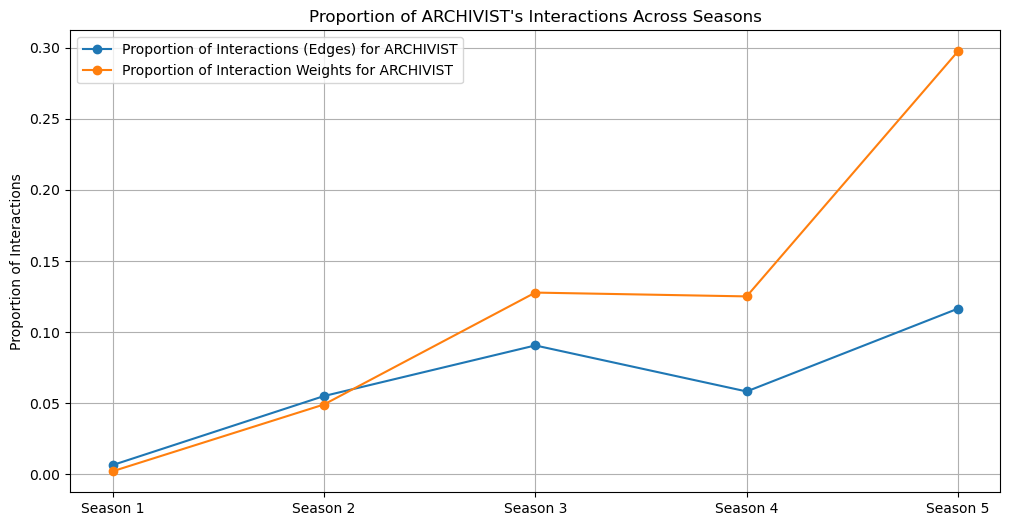

In [46]:
archivist = 'ARCHIVIST'

total_nodes = []
total_edges = []
total_interactions = []

archivist_edges = []
archivist_weights = []

# Collect data for total and the ARCHIVIST
for G in graphs:
    
    # Number of interactions the ARCHIVIST is involved in
    archivist_interactions = sum(1 for u, v in G.edges() if archivist in [u, v])
    archivist_edges.append(archivist_interactions)
    
    # Total weight of interactions the ARCHIVIST is involved in
    archivist_weight = sum(data['weight'] for u, v, data in G.edges(data=True) if archivist in [u, v])
    archivist_weights.append(archivist_weight)

# Calculate proportions for the ARCHIVIST
proportion_archivist_edges = [e / total_edges_sum for e in archivist_edges]
proportion_archivist_weights = [w / total_interactions_sum for w in archivist_weights]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, proportion_archivist_edges, label='Proportion of Interactions (Edges) for ARCHIVIST', marker='o')
plt.plot(x, proportion_archivist_weights, label='Proportion of Interaction Weights for ARCHIVIST', marker='o')

plt.xticks(x, seasons)
plt.ylabel('Proportion of Interactions')
plt.title('Proportion of ARCHIVIST\'s Interactions Across Seasons')
plt.legend()
plt.grid(True)
plt.show()

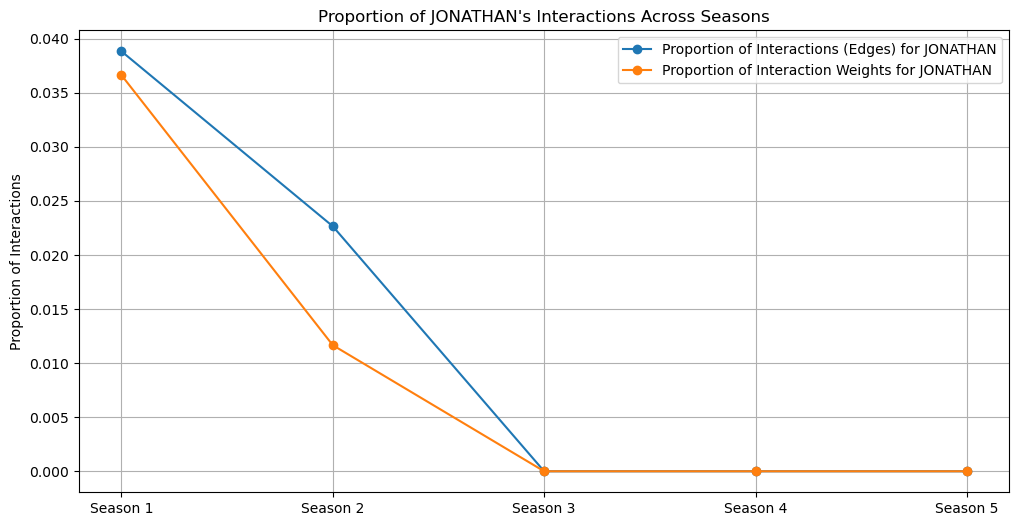

In [43]:
jonathan = 'JONATHAN'

total_nodes = []
total_edges = []
total_interactions = []

jonathan_edges = []
jonathan_weights = []

for G in graphs:
    
    jonathan_interactions = sum(1 for u, v in G.edges() if jonathan in [u, v])
    jonathan_edges.append(jonathan_interactions)

    jonathan_weight = sum(data['weight'] for u, v, data in G.edges(data=True) if jonathan in [u, v])
    jonathan_weights.append(jonathan_weight)

proportion_jonathan_edges = [e / total_edges_sum for e in jonathan_edges]
proportion_jonathan_weights = [w / total_interactions_sum for w in jonathan_weights]

plt.figure(figsize=(12, 6))
plt.plot(x, proportion_jonathan_edges, label='Proportion of Interactions (Edges) for JONATHAN', marker='o')
plt.plot(x, proportion_jonathan_weights, label='Proportion of Interaction Weights for JONATHAN', marker='o')

plt.xticks(x, seasons)
plt.ylabel('Proportion of Interactions')
plt.title('Proportion of JONATHAN\'s Interactions Across Seasons')
plt.legend()
plt.grid(True)
plt.show()

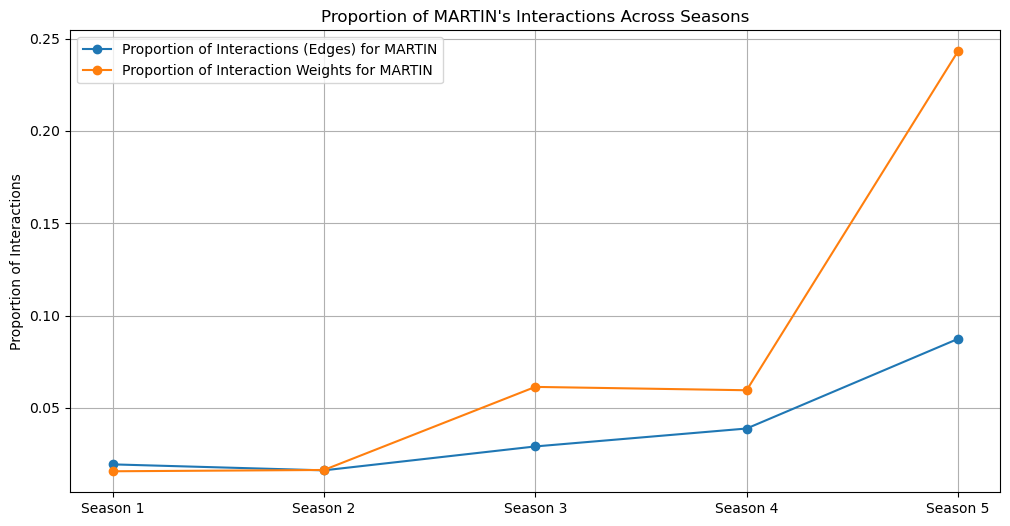

In [44]:
martin = 'MARTIN'

total_nodes = []
total_edges = []
total_interactions = []

martin_edges = []
martin_weights = []

for G in graphs:
    
    martin_interactions = sum(1 for u, v in G.edges() if martin in [u, v])
    martin_edges.append(martin_interactions)
    
    martin_weight = sum(data['weight'] for u, v, data in G.edges(data=True) if martin in [u, v])
    martin_weights.append(martin_weight)

proportion_martin_edges = [e / total_edges_sum for e in martin_edges]
proportion_martin_weights = [w / total_interactions_sum for w in martin_weights]

plt.figure(figsize=(12, 6))
plt.plot(x, proportion_martin_edges, label='Proportion of Interactions (Edges) for MARTIN', marker='o')
plt.plot(x, proportion_martin_weights, label='Proportion of Interaction Weights for MARTIN', marker='o')

plt.xticks(x, seasons)
plt.ylabel('Proportion of Interactions')
plt.title('Proportion of MARTIN\'s Interactions Across Seasons')
plt.legend()
plt.grid(True)
plt.show()

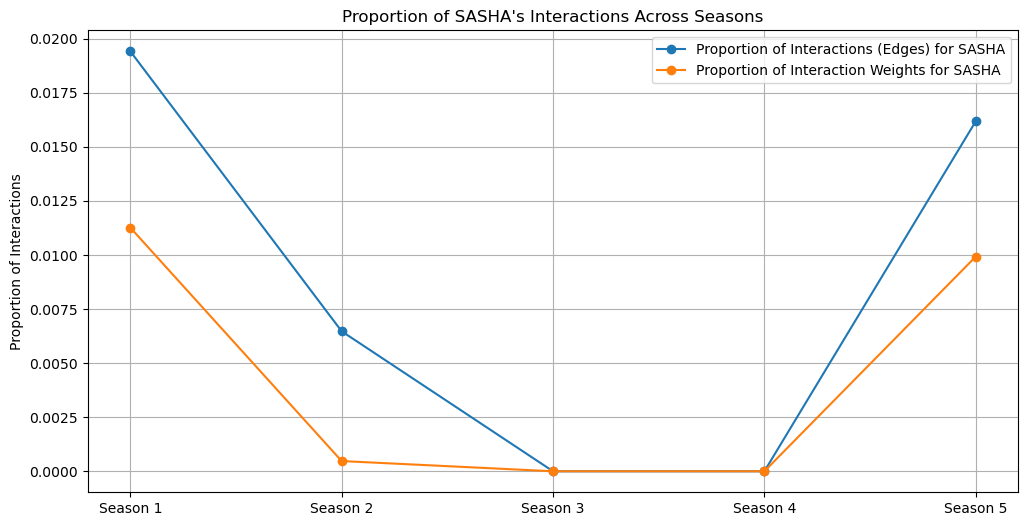

In [45]:
sasha = 'SASHA'

total_nodes = []
total_edges = []
total_interactions = []

sasha_edges = []
sasha_weights = []

for G in graphs:

    sasha_interactions = sum(1 for u, v in G.edges() if sasha in [u, v])
    sasha_edges.append(sasha_interactions)
    
    sasha_weight = sum(data['weight'] for u, v, data in G.edges(data=True) if sasha in [u, v])
    sasha_weights.append(sasha_weight)

proportion_sasha_edges = [e / total_edges_sum for e in sasha_edges]
proportion_sasha_weights = [w / total_interactions_sum for w in sasha_weights]

plt.figure(figsize=(12, 6))
plt.plot(x, proportion_sasha_edges, label='Proportion of Interactions (Edges) for SASHA', marker='o')
plt.plot(x, proportion_sasha_weights, label='Proportion of Interaction Weights for SASHA', marker='o')

plt.xticks(x, seasons)
plt.ylabel('Proportion of Interactions')
plt.title('Proportion of SASHA\'s Interactions Across Seasons')
plt.legend()
plt.grid(True)
plt.show()

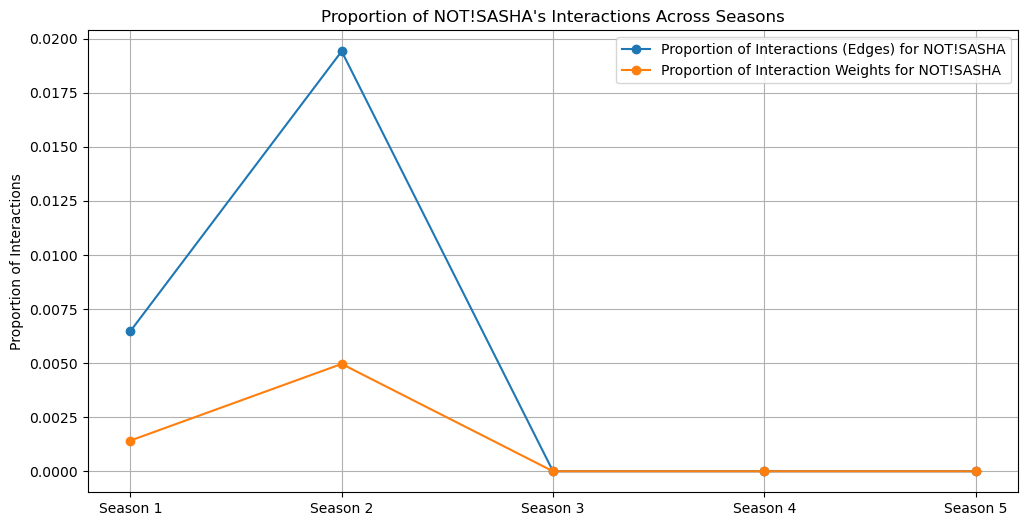

In [26]:
not_sasha = 'NOT!SASHA'

total_nodes = []
total_edges = []
total_interactions = []

not_sasha_edges = []
not_sasha_weights = []

for G in graphs:
    
    not_sasha_interactions = sum(1 for u, v in G.edges() if not_sasha in [u, v])
    not_sasha_edges.append(not_sasha_interactions)

    not_sasha_weight = sum(data['weight'] for u, v, data in G.edges(data=True) if not_sasha in [u, v])
    not_sasha_weights.append(not_sasha_weight)

proportion_not_sasha_edges = [e / total_edges_sum for e in not_sasha_edges]
proportion_not_sasha_weights = [w / total_interactions_sum for w in not_sasha_weights]

plt.figure(figsize=(12, 6))
plt.plot(x, proportion_not_sasha_edges, label='Proportion of Interactions (Edges) for NOT!SASHA', marker='o')
plt.plot(x, proportion_not_sasha_weights, label='Proportion of Interaction Weights for NOT!SASHA', marker='o')

plt.xticks(x, seasons)
plt.ylabel('Proportion of Interactions')
plt.title('Proportion of NOT!SASHA\'s Interactions Across Seasons')
plt.legend()
plt.grid(True)
plt.show()

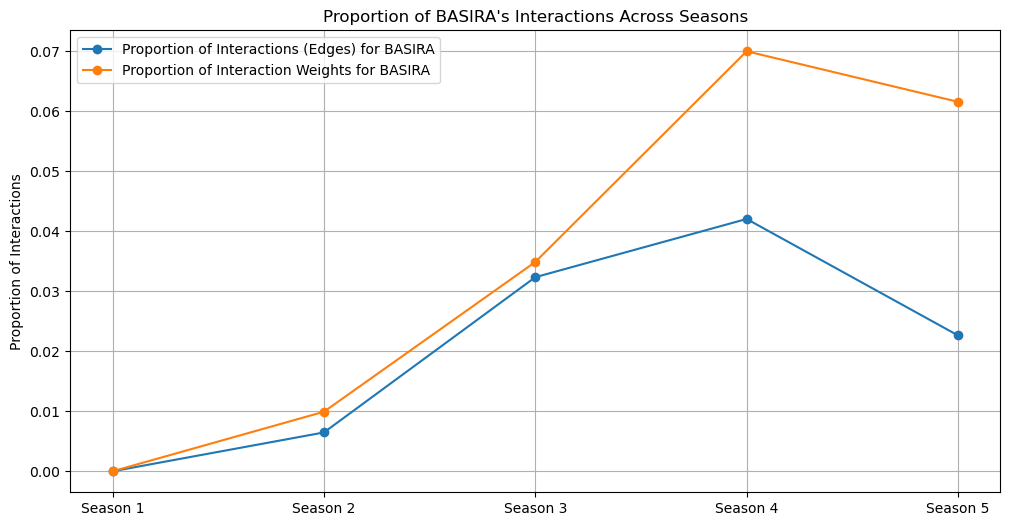

In [27]:
basira = 'BASIRA'

total_nodes = []
total_edges = []
total_interactions = []

basira_edges = []
basira_weights = []

for G in graphs:
    
    basira_interactions = sum(1 for u, v in G.edges() if basira in [u, v])
    basira_edges.append(basira_interactions)
    
    basira_weight = sum(data['weight'] for u, v, data in G.edges(data=True) if basira in [u, v])
    basira_weights.append(basira_weight)

proportion_basira_edges = [e / total_edges_sum for e in basira_edges]
proportion_basira_weights = [w / total_interactions_sum for w in basira_weights]

plt.figure(figsize=(12, 6))
plt.plot(x, proportion_basira_edges, label='Proportion of Interactions (Edges) for BASIRA', marker='o')
plt.plot(x, proportion_basira_weights, label='Proportion of Interaction Weights for BASIRA', marker='o')

plt.xticks(x, seasons)
plt.ylabel('Proportion of Interactions')
plt.title('Proportion of BASIRA\'s Interactions Across Seasons')
plt.legend()
plt.grid(True)
plt.show()


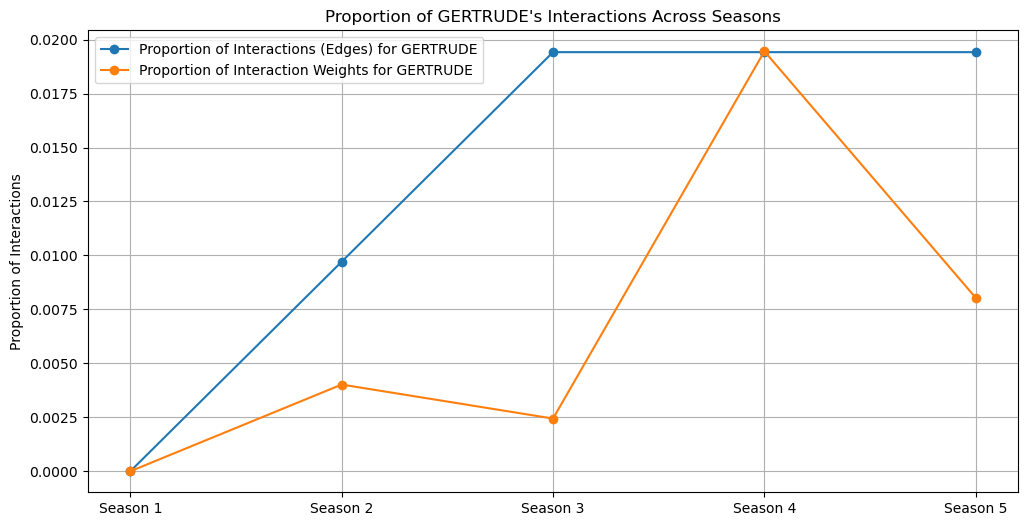

In [30]:
gertrude = 'GERTRUDE'

total_nodes = []
total_edges = []
total_interactions = []

gertrude_edges = []
gertrude_weights = []

for G in graphs:
    
    gertrude_interactions = sum(1 for u, v in G.edges() if gertrude in [u, v])
    gertrude_edges.append(gertrude_interactions)
    
    gertrude_weight = sum(data['weight'] for u, v, data in G.edges(data=True) if gertrude in [u, v])
    gertrude_weights.append(gertrude_weight)

proportion_gertrude_edges = [e / total_edges_sum for e in gertrude_edges]
proportion_gertrude_weights = [w / total_interactions_sum for w in gertrude_weights]

plt.figure(figsize=(12, 6))
plt.plot(x, proportion_gertrude_edges, label='Proportion of Interactions (Edges) for GERTRUDE', marker='o')
plt.plot(x, proportion_gertrude_weights, label='Proportion of Interaction Weights for GERTRUDE', marker='o')

plt.xticks(x, seasons)
plt.ylabel('Proportion of Interactions')
plt.title('Proportion of GERTRUDE\'s Interactions Across Seasons')
plt.legend()
plt.grid(True)
plt.show()

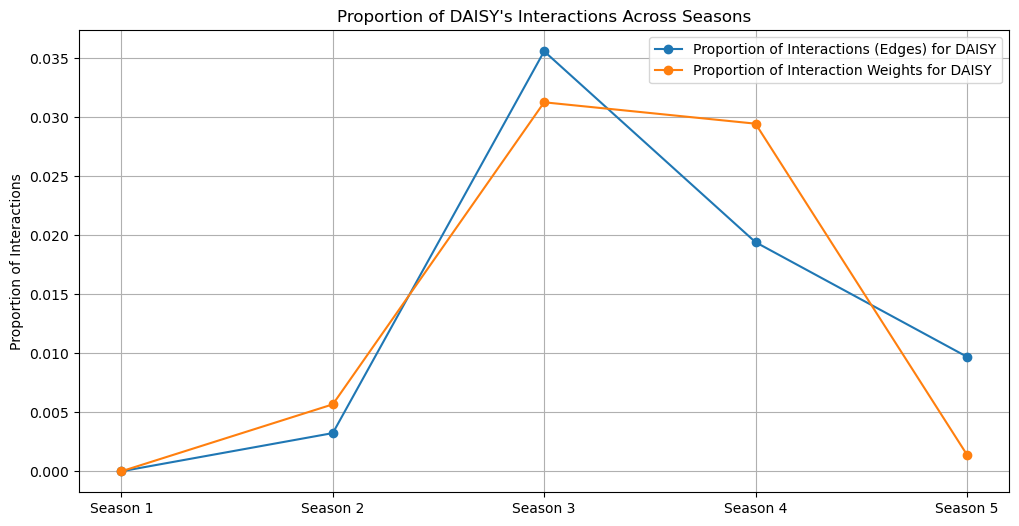

In [31]:
daisy = 'DAISY'

total_nodes = []
total_edges = []
total_interactions = []

daisy_edges = []
daisy_weights = []

for G in graphs:
    
    daisy_interactions = sum(1 for u, v in G.edges() if daisy in [u, v])
    daisy_edges.append(daisy_interactions)
    
    daisy_weight = sum(data['weight'] for u, v, data in G.edges(data=True) if daisy in [u, v])
    daisy_weights.append(daisy_weight)

proportion_daisy_edges = [e / total_edges_sum for e in daisy_edges]
proportion_daisy_weights = [w / total_interactions_sum for w in daisy_weights]

plt.figure(figsize=(12, 6))
plt.plot(x, proportion_daisy_edges, label='Proportion of Interactions (Edges) for DAISY', marker='o')
plt.plot(x, proportion_daisy_weights, label='Proportion of Interaction Weights for DAISY', marker='o')

plt.xticks(x, seasons)
plt.ylabel('Proportion of Interactions')
plt.title('Proportion of DAISY\'s Interactions Across Seasons')
plt.legend()
plt.grid(True)
plt.show()